In [1]:
from SimPEG import Mesh, Maps, EM, Utils
import numpy as np
from em_examples.TransientVMDCylWidget import TransientVMDCylWidget
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
vmd = TransientVMDCylWidget()
m = vmd.setThreeLayerParam()

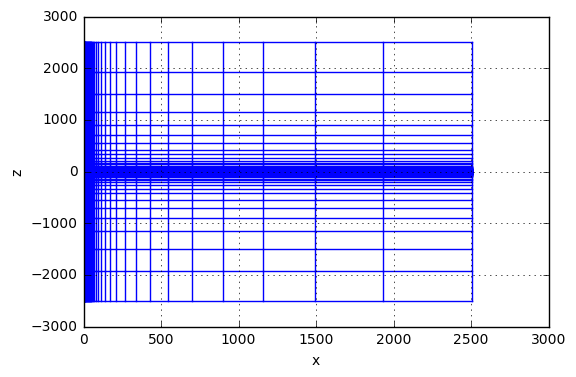

In [5]:
vmd.mesh.plotGrid()

In [6]:
%%time
rxOffset = 0.
radius = 1.
rxLoc = np.array([[rxOffset, 0., 0.]])
time = np.logspace(-5, -2, 41)         
bz = EM.TDEM.Rx(rxLoc,time,'bz')
dbzdt = EM.TDEM.Rx(rxLoc,time,'dbzdt')
src = EM.TDEM.Src.CircularLoop([bz],
                               waveform=EM.TDEM.Src.StepOffWaveform(),
                               loc=np.array([0., 0., 0.]), radius=radius)
prb = EM.TDEM.Problem3D_b(vmd.mesh, sigmaMap=vmd.mapping)
prb.timeSteps = [(1e-06, 10), (5e-06, 10), (1e-05, 10), (5e-5, 10), (1e-4, 10), (5e-4, 10), (1e-3, 10)]
survey = EM.TDEM.Survey([src])
prb.pair(survey)
m1 = np.zeros_like(m) + 1.
f = prb.fields(m1)
prb = prb
dpred = survey.dpred(m, f=f)

CPU times: user 2.02 s, sys: 95.3 ms, total: 2.11 s
Wall time: 2.15 s


In [7]:
f[src, 'bSolution', :].shape

(4935, 71)

In [8]:
prb.times[10]

1.0000000000000001e-05

In [9]:
from scipy.constants import mu_0
sig = np.unique(m1)[0]
dana = EM.Analytics.hzAnalyticCentLoopT(radius, time, sig) * mu_0
# dana = EM.Analytics.hzAnalyticDipoleT(1., time, 0.01) * mu_0 * np.pi

In [10]:
EM.Analytics.hzAnalyticDipoleT?

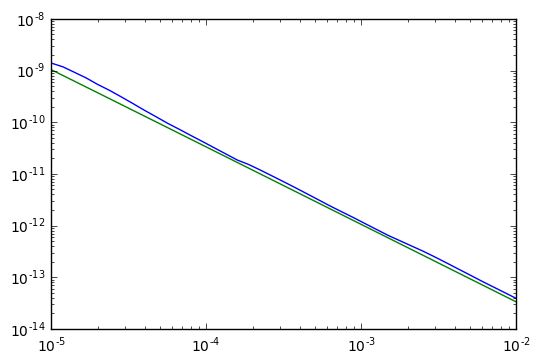

In [11]:
plt.loglog(time, dpred)
plt.loglog(time, dana)